### Fig 3 Right hand side

In [1]:
import sisl
from sisl import *
import sisl.viz
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sisl.viz import merge_plots
from sisl.viz.processors.math import normalize
from functools import partial
# To quickly plot the hamiltonian matrix
import plotly.express as px
import cmath
import scipy
from scipy.linalg import ishermitian
from scipy.linalg import schur, eigvals


In [2]:
cell = Geometry(
    [[0, 0, 0], [1, 0, 0]],
    [Atom("C", maxR =1.43420), Atom("C", maxR = 1.43420)],
    lattice=Lattice([2.0, 10, 10], nsc=[3, 1, 1]) #, origin=[-5] * 3
)

In [3]:
# triv
N = 10
M = 2
t1 = 1.333
t2 = 0.666
ig1 = np.arange(-4, 4.05, 0.05)
#ig2 = ig1/100

eR = []
vR = []
eL = []
vL = []

psi2R = []
psi2L = []

eigOBCTriv = []
eigPBCTriv =[]

edgeState = []
filledVz = []

for i in np.arange(len(ig1)):
        H0 = sisl.Hamiltonian(cell, dtype ='complex')
        H0[0, 0] = -ig1[i]*1j
        H0[1, 1] = -ig1[i]*1j
        H0[0, 1] = t1
        H0[1, 0] = t1
        H0[0, 1, (-1, 0)] = t2
        H0[1, 0, (1, 0)] = t2
        #band3 = sisl.BandStructure(H3, [[-0.5, 0.0, 0], [0., 0., 0], [0.5, 0.0, 0]], 151, ['-K', r'$\Gamma$', 'K'])
        #eigs4 = band3.apply.array.eig()
        #eigs5.append(eigs4)
        H1 = H0.tile(N,0)
        #H1[19, 19] = ig2
        for j in np.arange(2*N-M, 2*N):
             H1[j,j] = 0
        # first, PBC
        eigPBCTriv.append(H1.eig())
        # now OBC
        H1.set_nsc([1, 1, 1])
        eigOBCTriv.append(H1.eig())
      # separating left and right
        eigValR, eigVecR = scipy.linalg.eig(H1.Hk().toarray()) 
        #idxR = np.lexsort((np.imag(eigValR), np.real(eigValR)))  # Sorting indices
        indicez = np.argsort(eigValR)
        # the sorted lists:
        eR0 = eigValR[indicez]
        vR0 = eigVecR[:,indicez]
        # separate HOMO and collect it
        es = vR0[:,N-1]
        es1 = np.square(abs(es))
        edgeState.append(es1)
        # now we collect them all
        eR.append(eR0)
        vR.append(vR0)
        # for the skin effect we calculate the absolute squaredz and sum them
        pR = np.square(abs(vR0))
        vR3 = [sum(e) for e in pR]
        psi2R.append(vR3)
      # all the squared ones collected
      # Compute the left eigenstates (eigenvectors of the Hermitian conjugate H†)
        '''
        H_dagger = np.conjugate(np.transpose(H1))
        eigValL, eigVecL = scipy.linalg.eig(H_dagger.Hk().toarray())
        idxL = np.argsort(eigValL)
        eL0 = eigValL[idxL]
        vL0 = eigVecL[:,idxL]
        eL.append(eL0)
        vL.append(vL0)
        lR = np.square(abs(vL0))
        vL3 = [sum(e2) for e2 in lR]
        psi2L.append(vL3)
        '''

In [4]:
N = 10
t1 = 0.666
t2 = 1.333
ig1 = complex(0,1)*np.arange(-4, 4.05, 0.05)
ig2 = 0

eR = []
vR = []
eL = []
vL = []

psi2R = []
psi2L = []

eigOBC = []
eigPBC =[]
eigPBCperf =[]

edgeState = []
filledVz = []

for i in np.arange(len(ig1)):
        H0 = sisl.Hamiltonian(cell, dtype ='complex')
        H1 = sisl.Hamiltonian(cell, dtype ='complex')
        H0[0, 0] = -ig1[i]
        H0[1, 1] = -ig1[i]
        H0[0, 1] = t1
        H0[1, 0] = t1
        H0[0, 1, (-1, 0)] = t2
        H0[1, 0, (1, 0)] = t2
        #band3 = sisl.BandStructure(H3, [[-0.5, 0.0, 0], [0., 0., 0], [0.5, 0.0, 0]], 151, ['-K', r'$\Gamma$', 'K'])
        #eigs4 = band3.apply.array.eig()
        #eigs5.append(eigs4)
        H1 = H0.tile(N,0)
        eigPBCperf.append(H1.eig())
        #H1[19, 19] = ig2
        for j in np.arange(2*N-M,20):
             H1[j,j] = ig2
        # first, PBC
        eigPBC.append(H1.eig()) # careful this isn't sorted!!!
        # now OBC
        H1.set_nsc([1, 1, 1])
        eigOBC.append(H1.eig())
      # separating left and right
        eigValR, eigVecR = scipy.linalg.eig(H1.Hk().toarray()) 
        #idxR = np.lexsort((np.imag(eigValR), np.real(eigValR)))  # Sorting indices
        indicez = np.argsort(eigValR)
        # the sorted lists:
        eR0 = eigValR[indicez]
        vR0 = eigVecR[:,indicez]
        # separate HOMO and collect it
        es = vR0[:,N-1]
        es1 = np.square(abs(es))
        edgeState.append(es1)
        # now we collect them all
        eR.append(eR0)
        vR.append(vR0)
        # for the skin effect we calculate the absolute squaredz and sum them
        pR = np.square(abs(vR0))
        vR3 = [sum(e) for e in pR]
        psi2R.append(vR3)
      # all the squared ones collected
      # Compute the left eigenstates (eigenvectors of the Hermitian conjugate H†)
        '''
        H_dagger = np.conjugate(np.transpose(H1))
        eigValL, eigVecL = scipy.linalg.eig(H_dagger.Hk().toarray())
        idxL = np.argsort(eigValL)
        eL0 = eigValL[idxL]
        vL0 = eigVecL[:,idxL]
        eL.append(eL0)
        vL.append(vL0)
        lR = np.square(abs(vL0))
        vL3 = [sum(e2) for e2 in lR]
        psi2L.append(vL3)
        '''

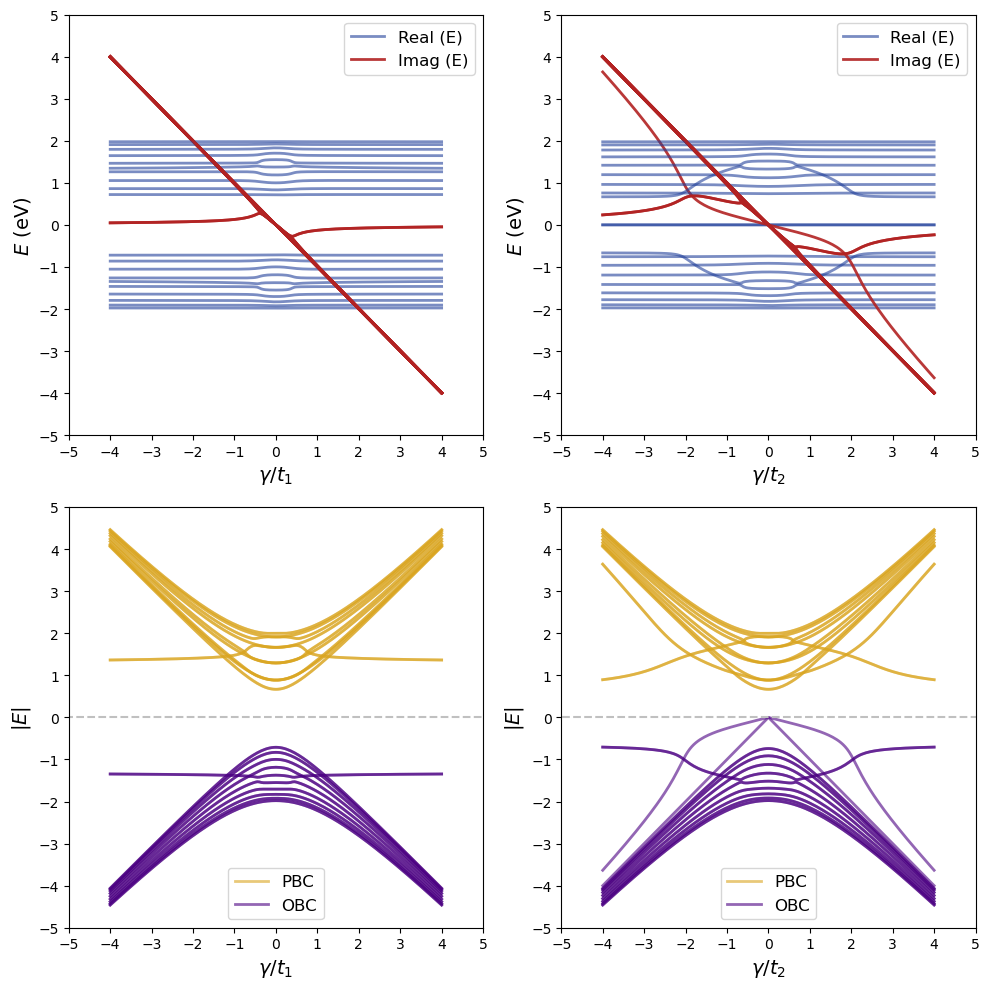

In [5]:
from scipy.optimize import linear_sum_assignment

# Adjust gamma_over_t1 and gamma_over_t2 based on t1 and t2
gamma_over_t1 = ig1.imag / 1
gamma_over_t2 = ig1.imag / 1

# Convert lists of eigenvalues to arrays
eigOBC_array = [np.array(eigs) for eigs in eigOBC]
eigOBCTriv_array = [np.array(eigs) for eigs in eigOBCTriv]
eigPBC_array = [np.array(eigs) for eigs in eigPBC]
eigPBCTriv_array = [np.array(eigs) for eigs in eigPBCTriv]

# Number of eigenvalues
num_eigenvalues = len(eigOBC_array[0])
num_gamma = len(ig1)

# Function to order eigenvalues consistently across gamma values
def order_eigenvalues(eig_list):
    eigs_ordered = np.zeros((num_gamma, num_eigenvalues), dtype=complex)
    eigs_ordered[0, :] = np.sort(eig_list[0])
    for i in range(1, num_gamma):
        previous_eigs = eigs_ordered[i-1, :]
        current_eigs = eig_list[i]
        # Compute distance matrix
        D = np.abs(previous_eigs[:, np.newaxis] - current_eigs[np.newaxis, :])
        # Solve the assignment problem
        row_ind, col_ind = linear_sum_assignment(D)
        # Reorder current eigenvalues
        current_eigs_ordered = np.zeros_like(current_eigs)
        current_eigs_ordered[row_ind] = current_eigs[col_ind]
        eigs_ordered[i, :] = current_eigs_ordered
    return eigs_ordered

# Order the eigenvalues for OBC and PBC cases, both trivial and non-trivial
eigs_OBC_ordered = order_eigenvalues(eigOBC_array)
eigs_OBCTriv_ordered = order_eigenvalues(eigOBCTriv_array)
eigs_PBC_ordered = order_eigenvalues(eigPBC_array)
eigs_PBCTriv_ordered = order_eigenvalues(eigPBCTriv_array)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# --- Subplot 1: Trivial Energy Eigenvalues (Line Plot) ---
ax1 = axes[0, 0]
for i in range(num_eigenvalues):
    ax1.plot(gamma_over_t1, eigs_OBCTriv_ordered[:, i].real,
             color=(33/255, 64/255, 154/255), alpha=0.6, lw=2)
    ax1.plot(gamma_over_t1, eigs_OBCTriv_ordered[:, i].imag,
             color='firebrick', alpha=0.9, lw=2)

ax1.set_xlabel(r'$\gamma / t_1$', fontsize=14)
ax1.set_ylabel(r'$E$ (eV)', fontsize=14)
#ax1.set_title("Trivial (OBC)", fontsize=16)
ax1.legend(['Real (E)', 'Imag (E)'], fontsize=12)
ax1.set_xticks(np.arange(-5, 5.01, 1))
ax1.set_yticks(np.arange(-5, 5.01, 1))

# --- Subplot 2: Non-trivial Energy Eigenvalues (Line Plot) ---
ax2 = axes[0, 1]
for i in range(num_eigenvalues):
    ax2.plot(gamma_over_t2, eigs_OBC_ordered[:, i].real,
             color=(33/255, 64/255, 154/255), alpha=0.6, lw=2)
    ax2.plot(gamma_over_t2, eigs_OBC_ordered[:, i].imag,
             color='firebrick', alpha=0.9, lw=2)

ax2.set_xlabel(r'$\gamma / t_2$', fontsize=14)
ax2.set_ylabel(r'$E$ (eV)', fontsize=14)
#ax2.set_title("Non-trivial (OBC)", fontsize=16)
ax2.legend(['Real (E)', 'Imag (E)'], fontsize=12)
ax2.set_xticks(np.arange(-5, 5.01, 1))
ax2.set_yticks(np.arange(-5, 5.01, 1))

# --- Subplot 3: Trivial Energy Eigenvalues (Line Plot) ---
ax3 = axes[1, 0]
for i in range(num_eigenvalues):
    # Plot PBC eigenvalues as positive values
    ax3.plot(gamma_over_t1, np.abs(eigs_PBCTriv_ordered[:, i]),
             color='goldenrod', alpha=0.6, lw=2) # (8/255, 135/255, 67/255)
    # Plot OBC eigenvalues as negative values
    ax3.plot(gamma_over_t1, -np.abs(eigs_OBCTriv_ordered[:, i]),
             color='indigo', alpha=0.6, lw=2)

# Add horizontal line at y=0
ax3.axhline(0, xmin=-5, xmax=5, ls='--', c='silver')

# Set labels and title
ax3.set_xlabel(r'$ \gamma  / t_1$', fontsize=14)
ax3.set_ylabel(r'$ |E|$', fontsize=14)
ax3.legend(['PBC', 'OBC'], fontsize=12)
ax3.set_xticks(np.arange(-5, 5.01, 1))
ax3.set_yticks(np.arange(-5, 5.01, 1))

# --- Subplot 4: Non-trivial Energy Eigenvalues (Line Plot) ---
ax4 = axes[1, 1]
for i in range(num_eigenvalues):
    # Plot PBC eigenvalues as positive values
    ax4.plot(gamma_over_t2, np.abs(eigs_PBC_ordered[:, i]),
             color='goldenrod', alpha=0.6, lw=2)
    # Plot OBC eigenvalues as negative values
    ax4.plot(gamma_over_t2, -np.abs(eigs_OBC_ordered[:, i]),
             color='indigo', alpha=0.6, lw=2)

# Add horizontal line at y=0
ax4.axhline(0, xmin=-5, xmax=5, ls='--', c='silver')

# Set labels and title
ax4.set_xlabel(r'$ \gamma  / t_2$', fontsize=14)
ax4.set_ylabel(r'$ |E|$', fontsize=14)
ax4.legend(['PBC', 'OBC'], fontsize=12)
ax4.set_xticks(np.arange(-5, 5.01, 1))
ax4.set_yticks(np.arange(-5, 5.01, 1))

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('fig3.pdf', format='pdf')
plt.show()


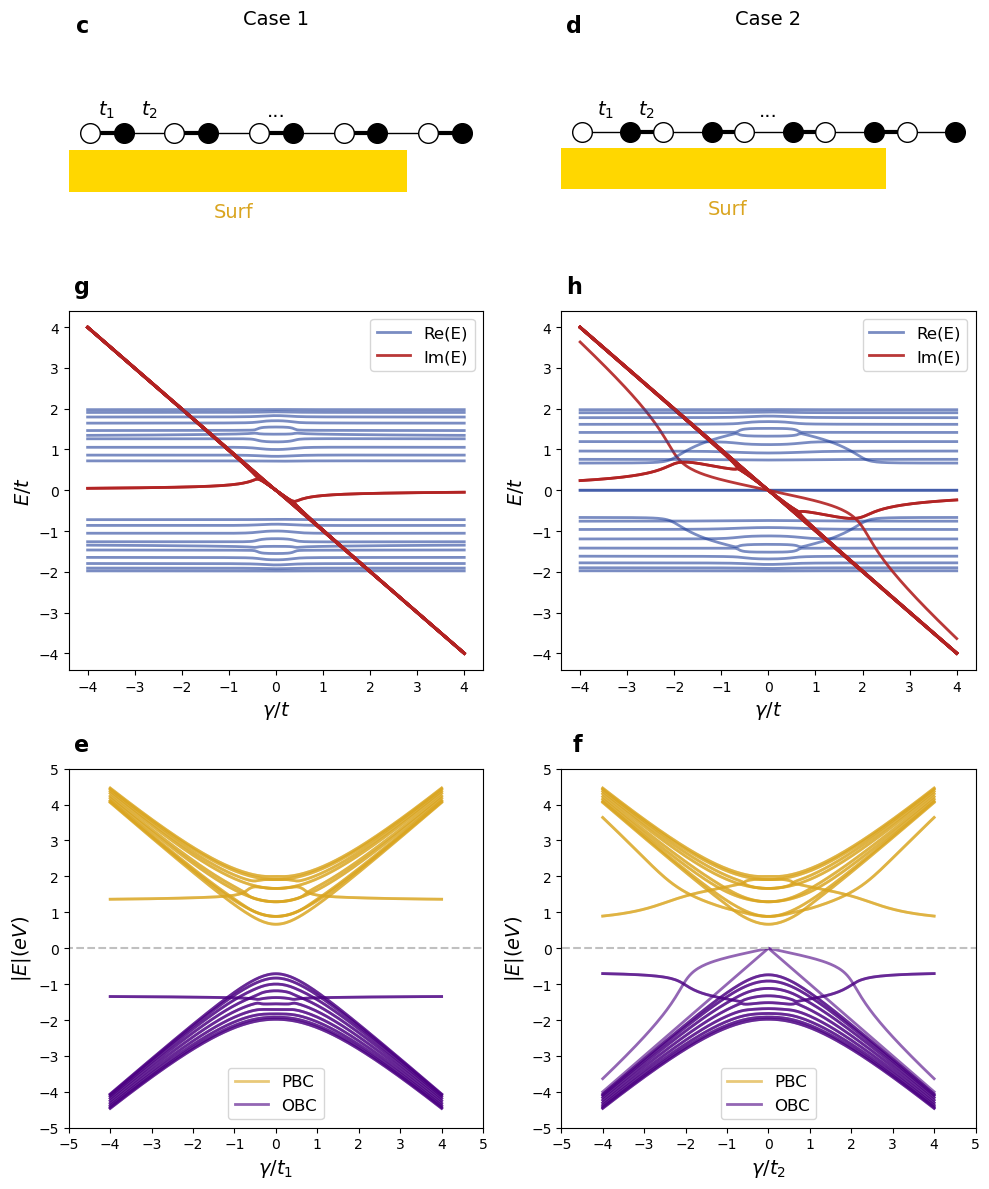

In [6]:
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec
N = 10  # Number of atoms in the chain

# Bond lengths (representing hopping parameters)
l1_trivial = 0.8  # Strong bond (shorter bond within unit cell) for trivial chain
l2_trivial = 1.2  # Weak bond (longer bond between unit cells) for trivial chain

l1_nontrivial = 1.2  # Weak bond (longer bond within unit cell) for non-trivial chain
l2_nontrivial = 0.8  # Strong bond (shorter bond between unit cells) for non-trivial chain

# Generate positions for the trivial SSH chain
positions_trivial = [0]
for n in range(1, N):
    if n % 2 == 1:
        positions_trivial.append(positions_trivial[-1] + l1_trivial)
    else:
        positions_trivial.append(positions_trivial[-1] + l2_trivial)

# Generate positions for the non-trivial SSH chain
positions_nontrivial = [0]
for n in range(1, N):
    if n % 2 == 1:
        positions_nontrivial.append(positions_nontrivial[-1] + l1_nontrivial)
    else:
        positions_nontrivial.append(positions_nontrivial[-1] + l2_nontrivial)

# Define atom types (A and B)
atom_types = ['A' if n % 2 == 0 else 'B' for n in range(N)]

# Create figure and subplots using GridSpec
fig = plt.figure(figsize=(10, 12))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 2, 2])  # Adjust height ratios

# Assign subplots to GridSpec positions
ax1 = fig.add_subplot(gs[0, 0])  # Panel a
ax2 = fig.add_subplot(gs[0, 1])  # Panel b
ax3 = fig.add_subplot(gs[1, 0])  # Panel c
ax4 = fig.add_subplot(gs[1, 1])  # Panel d
ax5 = fig.add_subplot(gs[2, 0])  # Panel e
ax6 = fig.add_subplot(gs[2, 1])  # Panel f

# Function to plot SSH chain
def plot_ssh_chain(ax, positions, chain_type):
    # Separate positions of A and B atoms
    positions_A = [positions[n] for n in range(N) if atom_types[n] == 'A']
    positions_B = [positions[n] for n in range(N) if atom_types[n] == 'B']

    substrate_y = -1.4  # Adjust the vertical position of the substrate
    substrate_height = 1.0  # Height of the substrate
    substrate_width = positions[-2] - positions[0]  # Width of the substrate
    ax.add_patch(Rectangle(
        (positions[0] - 0.5, substrate_y),  # Bottom-left corner
        substrate_width, substrate_height,  # Width and height
        facecolor='gold', edgecolor='none', zorder=1 #goldenrod edge?
    ))
    # Plot atoms
    ax.scatter(positions_A, [0]*len(positions_A), s=200, facecolors='white', edgecolors='k', zorder=3)
    ax.scatter(positions_B, [0]*len(positions_B), s=200, facecolors='black', edgecolors='k', zorder=3)

    # Plot bonds and add labels
    for n in range(N - 1):
        x_values = [positions[n], positions[n + 1]]
        y_values = [0, 0]
        # Determine bond type
        if chain_type == 'trivial':
            if n % 2 == 0:
                linewidth = 3  # Strong bond within unit cell
                bond_label = r'$t_1$'
            else:
                linewidth = 1  # Weak bond between unit cells
                bond_label = r'$t_2$'
        else:
            if n % 2 == 0:
                linewidth = 1  # Weak bond within unit cell
                bond_label = r'$t_1$'
            else:
                linewidth = 3  # Strong bond between unit cells
                bond_label = r'$t_2$'
        # Plot the bond
        ax.plot(x_values, y_values, c='k', linewidth=linewidth)
        # Add bond label only for specific bonds in the middle unit cell
        if n == 0 or n == 1:  # Bonds within the highlighted unit cell
            midpoint = (positions[n] + positions[n + 1]) / 2
            ax.text(midpoint, 0.3, bond_label, fontsize=14, ha='center', va='bottom')
    # Label all atoms
    ax.text((positions[4] + positions[4 + 1]) / 2, 0.3, '...', fontsize=14, ha='center', va='bottom')
    ax.text((positions[3] + positions[4])/2, -2.1, 'Surf', fontsize=14, ha='center', va='bottom',  c='goldenrod')


#    for i in np.arange(len(positions)-2):
#        ax.text(positions[i], -1.0, r'$i \gamma $', fontsize=14, ha='center', va='bottom')
    
#    ax.text(positions[N-2], -1.0, r'$0$', fontsize=14, ha='center', va='bottom')
#    ax.text(positions[N-1], -1.0, r'$0$', fontsize=14, ha='center', va='bottom')
    
    # Highlight the middle unit cell
    unit_cell_start = positions[4]
    unit_cell_end = positions[6]
    width = unit_cell_end - unit_cell_start
#    rect = Rectangle((unit_cell_start, -0.5), width, 1.5, linewidth=1, edgecolor='r', linestyle='--', facecolor='none')
#    ax.add_patch(rect)

    # Set plot limits and remove axes
    ax.set_ylim(-1, 1.5)
    ax.set_xlim(positions[0] - 0.5, positions[-1] + 0.5)
    ax.set_aspect('equal', adjustable='datalim')
    ax.axis('off')

# Plot trivial SSH chain in subplot (a)
plot_ssh_chain(ax1, positions_trivial, 'trivial')
ax1.set_title('Case 1', fontsize=14)

# Plot non-trivial SSH chain in subplot (b)
plot_ssh_chain(ax2, positions_nontrivial, 'non-trivial')
ax2.set_title('Case 2', fontsize=14)
from scipy.optimize import linear_sum_assignment

# Adjust gamma_over_t1 and gamma_over_t2 based on t1 and t2
gamma_over_t1 = ig1.imag / 1
gamma_over_t2 = ig1.imag / 1

# Convert lists of eigenvalues to arrays
eigOBC_array = [np.array(eigs) for eigs in eigOBC]
eigOBCTriv_array = [np.array(eigs) for eigs in eigOBCTriv]
eigPBC_array = [np.array(eigs) for eigs in eigPBC]
eigPBCTriv_array = [np.array(eigs) for eigs in eigPBCTriv]

# Number of eigenvalues
num_eigenvalues = len(eigOBC_array[0])
num_gamma = len(ig1)

# Function to order eigenvalues consistently across gamma values
def order_eigenvalues(eig_list):
    eigs_ordered = np.zeros((num_gamma, num_eigenvalues), dtype=complex)
    eigs_ordered[0, :] = np.sort(eig_list[0])
    for i in range(1, num_gamma):
        previous_eigs = eigs_ordered[i-1, :]
        current_eigs = eig_list[i]
        # Compute distance matrix
        D = np.abs(previous_eigs[:, np.newaxis] - current_eigs[np.newaxis, :])
        # Solve the assignment problem
        row_ind, col_ind = linear_sum_assignment(D)
        # Reorder current eigenvalues
        current_eigs_ordered = np.zeros_like(current_eigs)
        current_eigs_ordered[row_ind] = current_eigs[col_ind]
        eigs_ordered[i, :] = current_eigs_ordered
    return eigs_ordered

# Order the eigenvalues for OBC and PBC cases, both trivial and non-trivial
eigs_OBC_ordered = order_eigenvalues(eigOBC_array)
eigs_OBCTriv_ordered = order_eigenvalues(eigOBCTriv_array)
eigs_PBC_ordered = order_eigenvalues(eigPBC_array)
eigs_PBCTriv_ordered = order_eigenvalues(eigPBCTriv_array)

# Create a 2x2 grid of subplots
#fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# --- Subplot 1: Trivial Energy Eigenvalues (Line Plot) ---
for i in range(num_eigenvalues):
    ax3.plot(gamma_over_t1, eigs_OBCTriv_ordered[:, i].real,
             color=(33/255, 64/255, 154/255), alpha=0.6, lw=2)
    ax3.plot(gamma_over_t1, eigs_OBCTriv_ordered[:, i].imag,
             color='firebrick', alpha=0.9, lw=2)

ax3.set_xlabel(r'$\gamma / t$', fontsize=14)
ax3.set_ylabel(r'$E / t$', fontsize=14)
#ax1.set_title("Trivial (OBC)", fontsize=16)
ax3.legend(['Re(E)', 'Im(E)'], fontsize=12)
ax3.set_xticks(np.arange(-4, 4.01, 1))
ax3.set_yticks(np.arange(-4, 4.01, 1))

# --- Subplot 2: Non-trivial Energy Eigenvalues (Line Plot) ---
for i in range(num_eigenvalues):
    ax4.plot(gamma_over_t2, eigs_OBC_ordered[:, i].real,
             color=(33/255, 64/255, 154/255), alpha=0.6, lw=2)
    ax4.plot(gamma_over_t2, eigs_OBC_ordered[:, i].imag,
             color='firebrick', alpha=0.9, lw=2)

ax4.set_xlabel(r'$\gamma / t$', fontsize=14)
ax4.set_ylabel(r'$E / t$', fontsize=14)
#ax2.set_title("Non-trivial (OBC)", fontsize=16)
ax4.legend(['Re(E)', 'Im(E)'], fontsize=12)
ax4.set_xticks(np.arange(-4, 4.01, 1))
ax4.set_yticks(np.arange(-4, 4.01, 1))

# --- Subplot 3: Trivial Energy Eigenvalues (Line Plot) ---
for i in range(num_eigenvalues):
    # Plot PBC eigenvalues as positive values
    ax5.plot(gamma_over_t1, np.abs(eigs_PBCTriv_ordered[:, i]),
             color='goldenrod', alpha=0.6, lw=2) # (8/255, 135/255, 67/255)
    # Plot OBC eigenvalues as negative values
    ax5.plot(gamma_over_t1, -np.abs(eigs_OBCTriv_ordered[:, i]),
             color='indigo', alpha=0.6, lw=2)

# Add horizontal line at y=0
ax5.axhline(0, xmin=-5, xmax=5, ls='--', c='silver')

# Set labels and title
ax5.set_xlabel(r'$ \gamma  / t_1$', fontsize=14)
ax5.set_ylabel(r'$ |E| (eV)$', fontsize=14)
ax5.legend(['PBC', 'OBC'], fontsize=12)
ax5.set_xticks(np.arange(-5, 5.01, 1))
ax5.set_yticks(np.arange(-5, 5.01, 1))

# --- Subplot 4: Non-trivial Energy Eigenvalues (Line Plot) ---
for i in range(num_eigenvalues):
    # Plot PBC eigenvalues as positive values
    ax6.plot(gamma_over_t2, np.abs(eigs_PBC_ordered[:, i]),
             color='goldenrod', alpha=0.6, lw=2)
    # Plot OBC eigenvalues as negative values
    ax6.plot(gamma_over_t2, -np.abs(eigs_OBC_ordered[:, i]),
             color='indigo', alpha=0.6, lw=2)

# Add horizontal line at y=0
ax6.axhline(0, xmin=-5, xmax=5, ls='--', c='silver')

# Set labels and title
ax6.set_xlabel(r'$ \gamma  / t_2$', fontsize=14)
ax6.set_ylabel(r'$ |E| (eV)$', fontsize=14)
ax6.legend(['PBC', 'OBC'], fontsize=12)
ax6.set_xticks(np.arange(-5, 5.01, 1))
ax6.set_yticks(np.arange(-5, 5.01, 1))

# Add panel labels
panel_labels = ['c', 'd', 'g', 'h', 'e', 'f']
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
for ax, label in zip(axes, panel_labels):
    ax.text(0.05, 1.10, label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

plt.tight_layout()
plt.savefig('fig4_0.pdf', format='pdf')
plt.show()

